In [1]:
import numpy as np
import pandas as pd
# We need to compute Y-theta max...
d1 = 362.5
d1error = 1
d2 = 116
d2error = 0.5 

# We divide by 100 to put them in meters...
dtotal = (d1 + d2) / 100
dtotalerror = np.sqrt(d1error ** 2 + d2error ** 2) / 100

print("Total Distance (m):", dtotal)
print("Error in Distance (m)", dtotalerror)

df = pd.read_csv("ShotData45Deg.csv")
v_avg = df["V0 (m/s)"].mean()
v_avg_error = df["V0 (m/s)"].std() / np.sqrt(len(df["V0 (m/s)"]))
print("Average Velocity (m/s):", v_avg)
print("Error in Average Velocity (m/s):", v_avg_error)

g = 9.8
theta = np.arctan((v_avg ** 2) / (g * dtotal))
theta_error = np.arctan((v_avg + v_avg_error) ** 2 / (g * (dtotal - dtotalerror))) - theta
theta_deg = np.rad2deg(theta)
theta_deg_error = np.rad2deg(theta_error)

print("Theoretical Maximum Angle (deg):", theta_deg)
print("Theoretical Maximum Angle Error (deg):", theta_deg_error)

Total Distance (m): 4.785
Error in Distance (m) 0.011180339887498949
Average Velocity (m/s): 6.648999999999999
Error in Average Velocity (m/s): 0.009243616415908023
Theoretical Maximum Angle (deg): 43.31259953908437
Theoretical Maximum Angle Error (deg): 0.14638119230482174


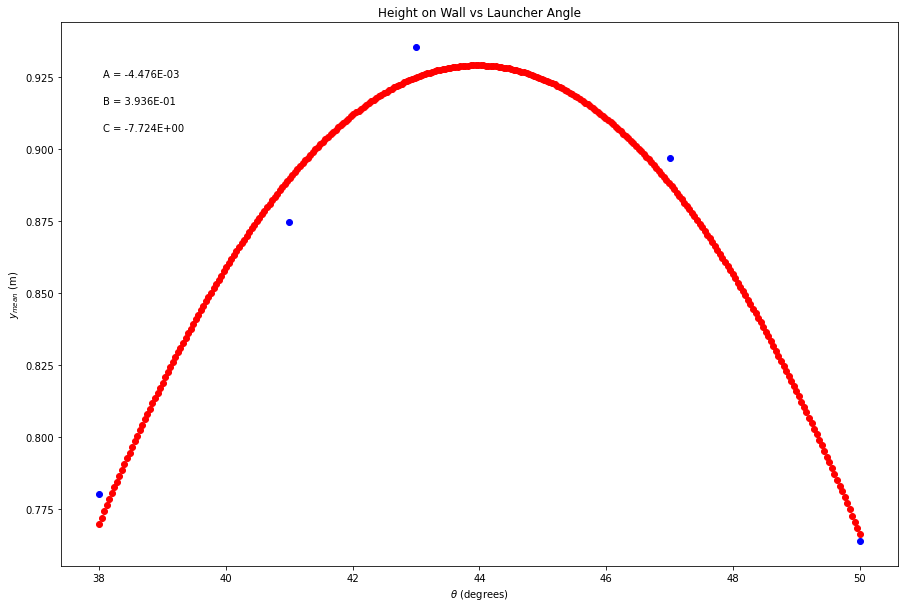

C =-7.7239708658370345, B = 0.393625215171273, A = -0.0044764202461434425
Experimental Maximum Angle (deg): 43.96651716406562
Error in Experimental Maximum Angle (deg): 1
Experimental Range of Angle (deg): 42.96651716406562 to 44.96651716406562


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


%matplotlib inline


#Create arrays for your data
df = pd.read_csv("Projectile_2020_Raw_Data.csv")

#Create an array for your y-axis uncertainties...
# Drop the angle collumn and transpose the table so we can 
# compute statistics per angle rather then per trial.
# We also divide by 100 to put the values in meters.
df_trans = df.drop(labels="Theta (deg)", axis="columns").transpose() / 100

#Reassign variables
x = df["Theta (deg)"]
y = df_trans.mean() # This computes the average of each collumn (per angle average)
dy = df_trans.std() / np.sqrt(len(df_trans)) 

#size the plot
plt.figure(figsize=(15,10))

#create scatter plot
plt.scatter(x, y, color='blue', marker='o')

#create labels
plt.xlabel('$\\theta$ (degrees)')
plt.ylabel('$y_{mean}$ (m)')
plt.title('Height on Wall vs Launcher Angle')

#fitting to a 2nd degree polynomial
c,b,a=np.polynomial.polynomial.polyfit(x,y,2,w=dy)

#Annotate with values of A, B, C from best fit polynomial
plt.annotate(f'A = {a:.3E}', (0.05, 0.9), xycoords='axes fraction')

plt.annotate(f'B = {b:.3E}', (0.05, 0.85), xycoords='axes fraction')
             
plt.annotate(f'C = {c:.3E}', (0.05, 0.8), xycoords='axes fraction')
#Create fit line
xnew = np.linspace(x.min(), x.max(), 300)
fit = a * xnew ** 2 + b * xnew + c

plt.scatter(xnew, fit, color='red')
plt.show()

print (f"C ={c}, B = {b}, A = {a}")

theta_exp = -b / (2 * a)
theta_exp_error = 1
print("Experimental Maximum Angle (deg):", theta_exp)
print("Error in Experimental Maximum Angle (deg):", theta_exp_error)
print(f"Experimental Range of Angle (deg): {theta_exp - theta_exp_error} to {theta_exp + theta_exp_error}")